In [2]:
import numpy
import scipy.special
from tqdm import tqdm
import matplotlib.pyplot as plt

class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.lr = learningrate
        
        #initialize the weights
        self.wih = (numpy.random.rand(self.hnodes,self.inodes)-0.5)
        self.who = (numpy.random.rand(self.onodes,self.hnodes)-0.5)
        
        #activation function
        self.activation_function = lambda x : scipy.special.expit(x)
    
        #local vars for results
        self.acc = []
        self.err = []
        self.tacc = []
        self.terr = []
        pass
    
    def query(self,input_list):
        inputs = numpy.array(input_list,ndmin=2).T

        hidden_inputs = numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

    
    def train(self, input_list, target_list):
        inputs = numpy.array(input_list,ndmin=2).T
        targets = numpy.array(target_list,ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        #update weights
        self.who += self.lr * numpy.dot((output_errors*final_outputs*(1-final_outputs)),numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors*hidden_outputs*(1-hidden_outputs)),numpy.transpose(inputs))
        pass
    
    def fit(self, input_data_list, test_data_list=[], epochs=10):
        for e in range(1,epochs+1):
            print("Training epoch :",e)
            for record in tqdm(input_data_list):
                all_values = record.split(",")
                inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
                targets = numpy.zeros(self.onodes)+0.01
                targets[int(all_values[0])]=0.99
                self.train(inputs,targets)
            a1,e1=self.evaluate(input_data_list)
            self.acc.append(a1)
            self.err.append(e1)
            if len(test_data_list)>0:
                a1,e1=self.evaluate(test_data_list)
                self.tacc.append(a1)
                self.terr.append(e1)
    pass

    def evaluate(self,training_data_list):
        scorecard = []
        for record in tqdm(training_data_list):
            all_values = record.split(",")
            correct_label = int(all_values[0])
            inputs = (numpy.asfarray(all_values[1:])/255*0.99)+0.01
            outputs = n.query(inputs)
            predicted_label = numpy.argmax(outputs)
            #print("Correct label:",correct_label,"Predicted :",predicted_label)
            if(correct_label==predicted_label):
                scorecard.append(1)
            else:
                scorecard.append(0)
            pass
        acc = sum(scorecard)/len(scorecard)
        err = 1-acc
        return acc,err
    
    

In [3]:
nn1 = neuralNetwork(3,10,1,0.1)

In [6]:
nn1.query([0,0,0])

array([[0.58289421]])

In [7]:
nn1.wih

array([[-0.47373258,  0.35517769,  0.12304246],
       [ 0.26864695, -0.44604609, -0.08326955],
       [-0.48164543, -0.26129593, -0.22620221],
       [-0.17020607, -0.16900153,  0.05892362],
       [ 0.03745181,  0.45908847, -0.07344005],
       [ 0.43846148,  0.35332039, -0.32009375],
       [-0.29831177, -0.12115496, -0.22939863],
       [-0.02961131, -0.2741451 ,  0.16265193],
       [-0.19363288, -0.15146109, -0.43602514],
       [ 0.26383268,  0.35833513, -0.42827477]])

In [8]:
nn1.who

array([[-0.33255213,  0.48622881,  0.12563679, -0.16860441,  0.17382798,
        -0.09417612,  0.34388745,  0.49183916, -0.09542617, -0.26132973]])

In [70]:
for i in range(1000):
    nn1.train([0,0,0],[0])
    nn1.train([1,1,1],[1])

In [51]:
nn1.who

array([[ 0.05893903,  0.25855142,  0.43768637,  0.01093633, -0.14606681,
        -0.43922066,  0.30335651,  0.39761892, -0.22116523,  0.11828916]])

In [7]:
import numpy as np

In [13]:
np.random.rand(3,3)

array([[0.40192568, 0.32738275, 0.45177907],
       [0.08949089, 0.61836273, 0.52415372],
       [0.40242826, 0.88408311, 0.47330643]])

In [71]:
nn1.query([0,0,0])

array([[0.06772232]])

In [72]:
nn1.query([1,1,1])

array([[0.9389102]])

In [73]:
nn1.query([0.5,0.5,0.5])

array([[0.80606124]])

In [76]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

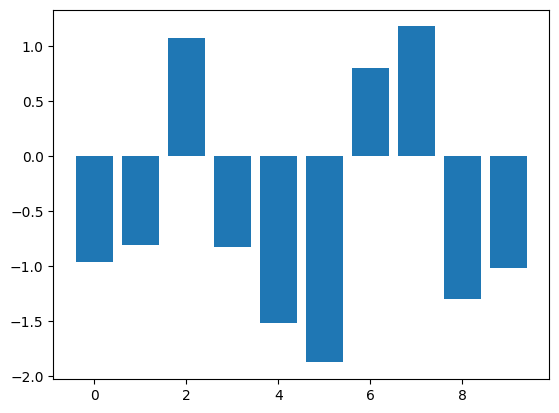

In [82]:
plt.bar(range(len(list(nn1.who[0]))),list(nn1.who[0]))

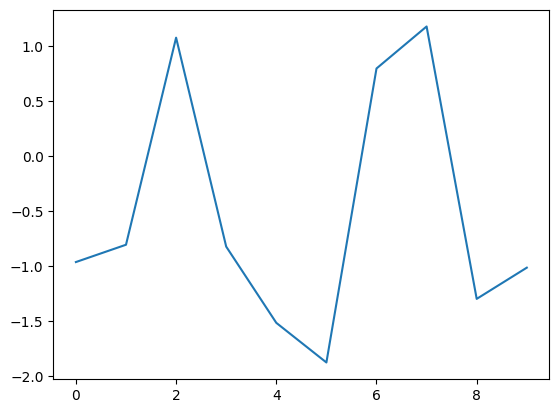

In [83]:
plt.plot(nn1.who[0])

In [80]:
nn1.who[0]

array([-0.96425726, -0.80648627,  1.08039468, -0.82349655, -1.51805543,
       -1.87931266,  0.79953843,  1.18235758, -1.29977483, -1.01533749])

In [10]:
icerik = open("mnist_dataset/mnist_test_10.csv").read()

In [11]:
satirlar = icerik.split("\n")

In [12]:
len(satirlar)

10

In [13]:
satirlar[0]

'7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,

In [19]:
sat1 = satirlar[0].split(",")[1:]

In [20]:
sat1

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

In [10]:
import numpy as np

In [12]:
ar1 = np.asfarray(sat1).reshape((28,28))

NameError: name 'sat1' is not defined

In [22]:
ar1

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [13]:
import matplotlib.pyplot as plt

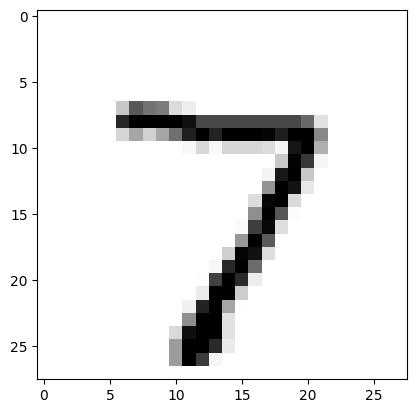

In [28]:
plt.imshow(ar1,cmap="Greys")

In [29]:
data_file= open("mnist_dataset/mnist_train_100.csv","r")
data_list = data_file.readlines()
data_file.close()

In [30]:
len(data_list)

100

In [31]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [53]:
all_values = data_list[1].split(",")

In [54]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))

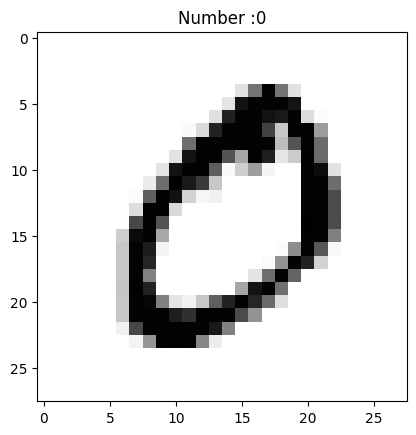

In [55]:
plt.title("Number :"+all_values[0])
plt.imshow(image_array, cmap="Greys")

In [45]:
scaled_input = (np.asfarray(all_values[1:])/255.0*0.99)+0.01

In [47]:
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [14]:
z = np.zeros(10)+ 0.01

In [16]:
z[int(all_values[0])]=0.99

NameError: name 'all_values' is not defined

In [15]:
z

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [62]:
all_values[0]

'0'

In [17]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

In [18]:
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [19]:
n.who.shape

(10, 100)

In [20]:
training_data_file = open("mnist_dataset/mnist_train.csv","r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [21]:
from tqdm import tqdm
for record in tqdm(training_data_list):
    all_values = record.split(",")
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = numpy.zeros(output_nodes)+0.01
    targets[int(all_values[0])]=0.99
    n.train(inputs,targets)
    pass


  0%|          | 0/60000 [00:00<?, ?it/s]

100%|██████████| 60000/60000 [00:31<00:00, 1911.82it/s]


In [22]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [23]:
all_values = test_data_list[0].split(",")
print(all_values[0])

7


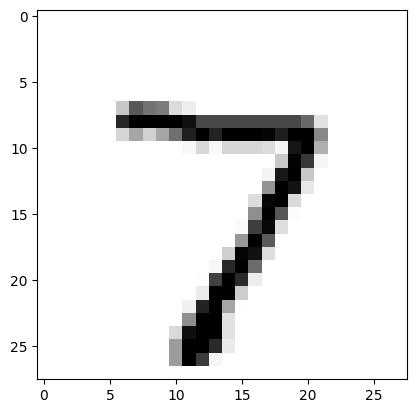

In [24]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array,cmap="Greys")

In [25]:
ntest = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01

In [26]:
n.query(ntest)

array([[1.35165800e-03],
       [5.82240656e-03],
       [1.79490403e-02],
       [1.76428278e-03],
       [2.54233197e-03],
       [9.21152225e-04],
       [1.84604426e-03],
       [9.96773258e-01],
       [1.59083210e-03],
       [3.45066243e-03]])

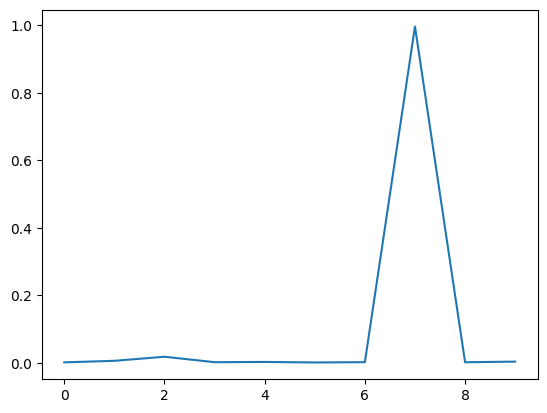

In [27]:
plt.plot(n.query(ntest))

In [28]:
n.query(ntest)

array([[1.35165800e-03],
       [5.82240656e-03],
       [1.79490403e-02],
       [1.76428278e-03],
       [2.54233197e-03],
       [9.21152225e-04],
       [1.84604426e-03],
       [9.96773258e-01],
       [1.59083210e-03],
       [3.45066243e-03]])

In [29]:
scorecard = []
for record in tqdm(test_data_list):
    all_values = record.split(",")
    correct_label = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:])/255*0.99)+0.01
    outputs = n.query(inputs)
    predicted_label = numpy.argmax(outputs)
    #print("Correct label:",correct_label,"Predicted :",predicted_label)
    if(correct_label==predicted_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
    pass

100%|██████████| 10000/10000 [00:02<00:00, 3925.24it/s]


In [30]:
len(scorecard)

10000

In [31]:
sum(scorecard)/len(scorecard)

0.9455

In [32]:
all_values=test_data_list[7].split(",")
tahmin=n.query((numpy.asfarray(all_values[1:])/255*0.99)+0.01)

In [33]:
tahmin

array([[0.00105112],
       [0.00308271],
       [0.00761126],
       [0.04221241],
       [0.0184009 ],
       [0.02177083],
       [0.0137989 ],
       [0.02457111],
       [0.00646657],
       [0.79572538]])

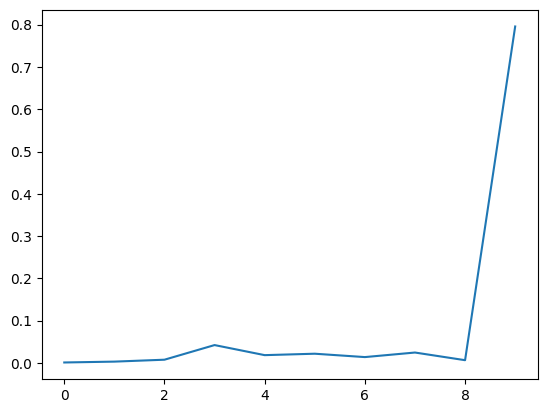

In [34]:
plt.plot(tahmin)

In [35]:
scorecard = []
for record in tqdm(training_data_list):
    all_values = record.split(",")
    correct_label = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:])/255*0.99)+0.01
    outputs = n.query(inputs)
    predicted_label = numpy.argmax(outputs)
    #print("Correct label:",correct_label,"Predicted :",predicted_label)
    if(correct_label==predicted_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
    pass

100%|██████████| 60000/60000 [00:19<00:00, 3091.93it/s]


In [36]:
sum(scorecard)/len(scorecard)

0.9477166666666667

In [37]:
len(scorecard)

60000

In [39]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [40]:
training_data_file = open("mnist_dataset/mnist_train.csv","r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [41]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [39]:
n.fit(input_data_list=training_data_list, test_data_list=test_data_list,epochs=2)

Training epoch : 1


100%|██████████| 10000/10000 [00:03<00:00, 3224.79it/s]


Training epoch : 2


100%|██████████| 10000/10000 [00:03<00:00, 3000.55it/s]


In [40]:
n.evaluate(test_data_list)

100%|██████████| 10000/10000 [00:03<00:00, 3133.02it/s]


(0.9454, 0.05459999999999998)

In [41]:
n.acc

[0.9532, 0.9519333333333333, 0.9598833333333333, 0.95725, 0.95625]

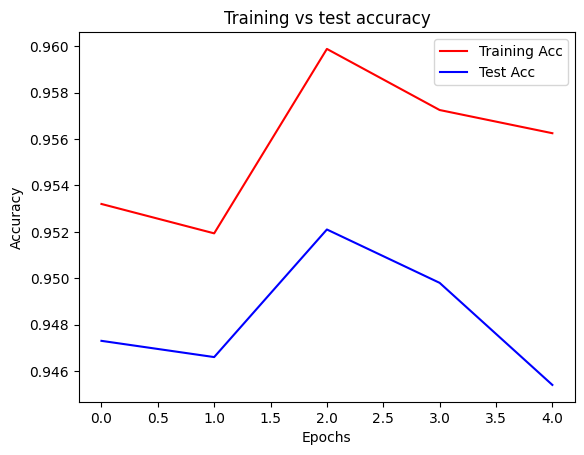

In [42]:
plt.plot(range(len(n.acc)),n.acc,"r",label="Training Acc")
plt.plot(range(len(n.acc)),n.tacc,"b",label="Test Acc")
plt.title("Training vs test accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


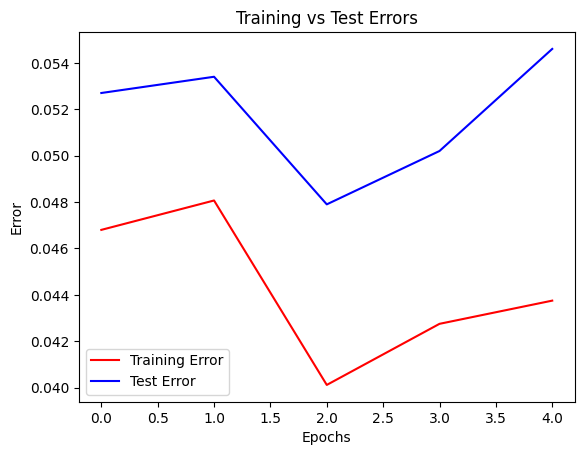

In [45]:
plt.plot(range(len(n.err)),n.err,"r",label="Training Error")
plt.plot(range(len(n.err)),n.terr,"b",label="Test Error")
plt.title("Training vs Test Errors")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

In [46]:
lrl = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [47]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
lr_tacc =[]

for lr in lrl:
    n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,lr)
    n.fit(training_data_list,test_data_list,1)
    lr_tacc.append(n.tacc[-1])


Training epoch : 1


100%|██████████| 10000/10000 [00:03<00:00, 3204.86it/s]


Training epoch : 1


100%|██████████| 10000/10000 [00:03<00:00, 3188.45it/s]


Training epoch : 1


100%|██████████| 10000/10000 [00:03<00:00, 3229.86it/s]


Training epoch : 1


100%|██████████| 10000/10000 [00:03<00:00, 2769.39it/s]


Training epoch : 1


100%|██████████| 10000/10000 [00:03<00:00, 3262.59it/s]


Training epoch : 1


100%|██████████| 10000/10000 [00:02<00:00, 3622.36it/s]


Training epoch : 1


100%|██████████| 10000/10000 [00:03<00:00, 3250.68it/s]


Training epoch : 1


100%|██████████| 10000/10000 [00:03<00:00, 3251.75it/s]


Training epoch : 1


100%|██████████| 10000/10000 [00:03<00:00, 3259.85it/s]


Training epoch : 1


100%|██████████| 10000/10000 [00:03<00:00, 3146.85it/s]


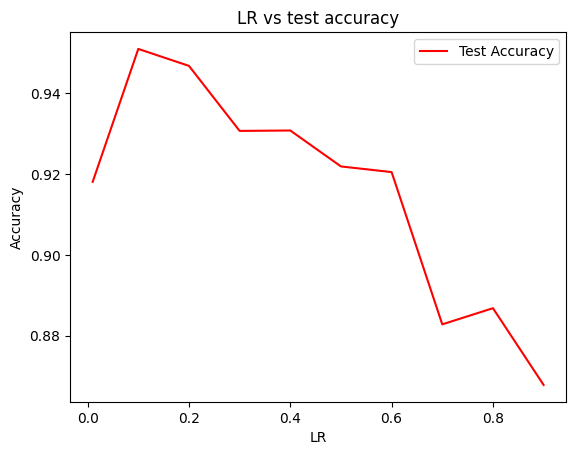

In [48]:
plt.plot(lrl,lr_tacc,"r",label="Test Accuracy")
plt.title("LR vs test accuracy")
plt.xlabel("LR")
plt.ylabel("Accuracy")
plt.legend()
plt.show()